In [1]:
import matplotlib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def shaptovalues(x):
    abs_val = np.absolute(x)
    return np.mean(abs_val, axis = 0)

In [3]:
# load dataset into Pandas DataFrame
test1 = pd.read_csv('testpoints1.csv')
test2 = pd.read_csv('testpoints2.csv')

test1 = test1[['OA_Cd_ratio','T_reactor','Cd_mM','Se_mM','t_s']]
test2 = test2[['OA_Cd_ratio','T_reactor','Cd_mM','Se_mM','t_s','Peak_eV']]

test1 = test1.set_axis(['[OA]/[Cd] ratio', 'Temperature (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)'], axis=1, inplace=False)
test2 = test2.set_axis(['[OA]/[Cd] ratio', 'Temperature (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)','Peak (eV)'], axis=1, inplace=False)

In [4]:
#Import Test data (Tree)
Tree_UV_peak_shap = np.genfromtxt('Tree_UV_peak_shap.csv', delimiter=',')
Tree_UV_fwhm_shap = np.genfromtxt('Tree_UV_fwhm_shap.csv', delimiter=',')
Tree_UV_cascade_shap = np.genfromtxt('Tree_UV_cascade_shap.csv', delimiter=',')
Tree_PL_peak_shap = np.genfromtxt('Tree_PL_peak_shap.csv', delimiter=',')
Tree_PL_fwhm_shap = np.genfromtxt('Tree_PL_fwhm_shap.csv', delimiter=',')
Tree_PL_cascade_shap = np.genfromtxt('Tree_PL_cascade_shap.csv', delimiter=',')

#Import Test data (RF)
RF_UV_peak_shap = np.genfromtxt('RF_UV_peak_shap.csv', delimiter=',')
RF_UV_fwhm_shap = np.genfromtxt('RF_UV_fwhm_shap.csv', delimiter=',')
RF_UV_cascade_shap = np.genfromtxt('RF_UV_cascade_shap.csv', delimiter=',')
RF_PL_peak_shap = np.genfromtxt('RF_PL_peak_shap.csv', delimiter=',')
RF_PL_fwhm_shap = np.genfromtxt('RF_PL_fwhm_shap.csv', delimiter=',')
RF_PL_cascade_shap = np.genfromtxt('RF_PL_cascade_shap.csv', delimiter=',')

#Import Test data (NN)
NN_UV_peak_shap = np.genfromtxt('NN_UV_peak_shap.csv', delimiter=',')
NN_UV_fwhm_shap = np.genfromtxt('NN_UV_fwhm_shap.csv', delimiter=',')
NN_UV_cascade_shap = np.genfromtxt('NN_UV_cascade_shap.csv', delimiter=',')
NN_PL_peak_shap = np.genfromtxt('NN_PL_peak_shap.csv', delimiter=',')
NN_PL_fwhm_shap = np.genfromtxt('NN_PL_fwhm_shap.csv', delimiter=',')
NN_PL_cascade_shap = np.genfromtxt('NN_PL_cascade_shap.csv', delimiter=',')

In [5]:
Tree_UV_peak_shap

array([[ 0.04822407, -0.02874003, -0.10660329, -0.00569047, -0.07020117],
       [-0.04457272,  0.10434959, -0.01749117, -0.01017245,  0.02854074],
       [-0.05214715,  0.01397017, -0.0479242 ,  0.00118512, -0.02081481],
       ...,
       [-0.04763978,  0.10184596,  0.1351576 ,  0.02273626, -0.02233868],
       [-0.0025279 ,  0.08271794, -0.06972785, -0.00409701, -0.09936715],
       [-0.02179405,  0.00543639, -0.06429256,  0.00113032, -0.09985672]])

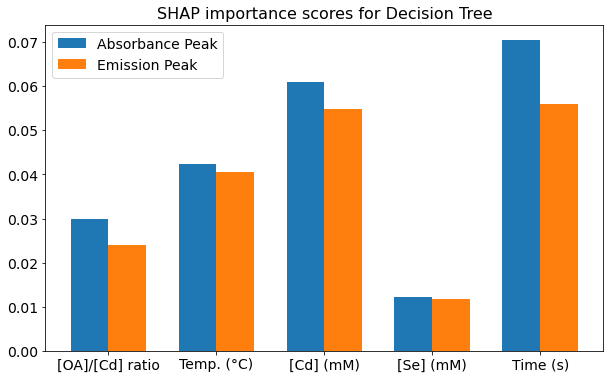

In [6]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(Tree_UV_peak_shap)
emission = shaptovalues(Tree_PL_peak_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance Peak')
ax.bar([i + width for i in x], emission, width, label='Emission Peak')

# Add a title to the chart
ax.set_title("SHAP importance scores for Decision Tree", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_peak_Tree.svg')

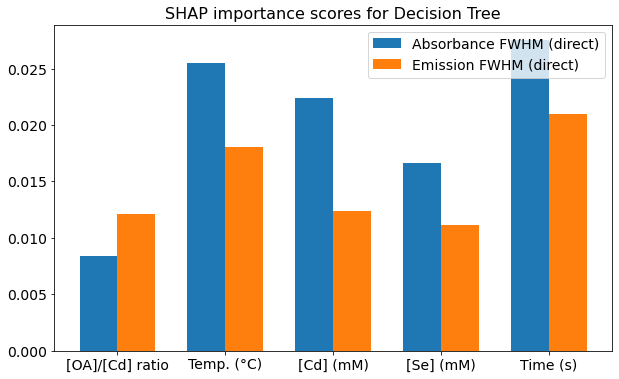

In [7]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(Tree_UV_fwhm_shap)
emission = shaptovalues(Tree_PL_fwhm_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (direct)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (direct)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Decision Tree", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_fwhm_Tree.svg')

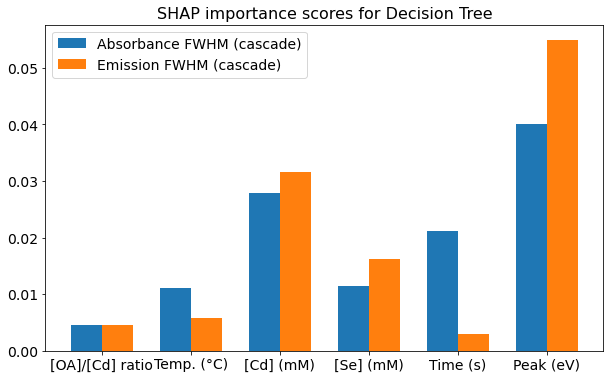

In [8]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)', 'Peak (eV)']
absorbance = shaptovalues(Tree_UV_cascade_shap)
emission = shaptovalues(Tree_PL_cascade_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (cascade)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (cascade)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Decision Tree", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_cascade_Tree.svg')

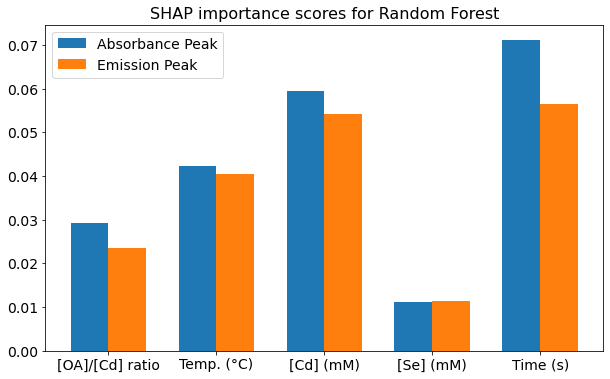

In [9]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(RF_UV_peak_shap)
emission = shaptovalues(RF_PL_peak_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance Peak')
ax.bar([i + width for i in x], emission, width, label='Emission Peak')

# Add a title to the chart
ax.set_title("SHAP importance scores for Random Forest", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_peak_RF.svg')

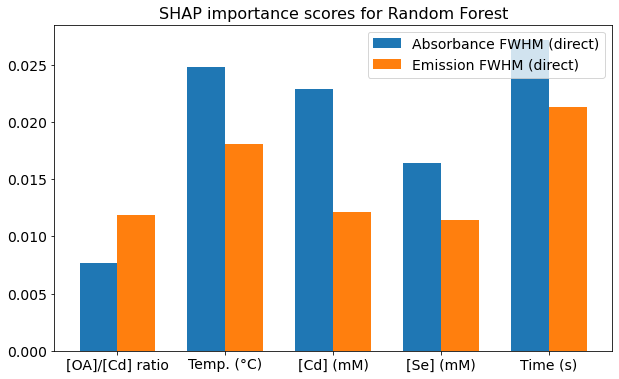

In [10]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(RF_UV_fwhm_shap)
emission = shaptovalues(RF_PL_fwhm_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (direct)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (direct)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Random Forest", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_fwhm_RF.svg')

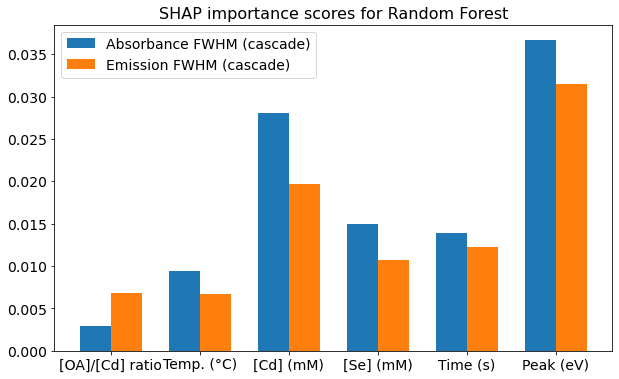

In [11]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)', 'Peak (eV)']
absorbance = shaptovalues(RF_UV_cascade_shap)
emission = shaptovalues(RF_PL_cascade_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (cascade)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (cascade)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Random Forest", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_cascade_RF.svg')

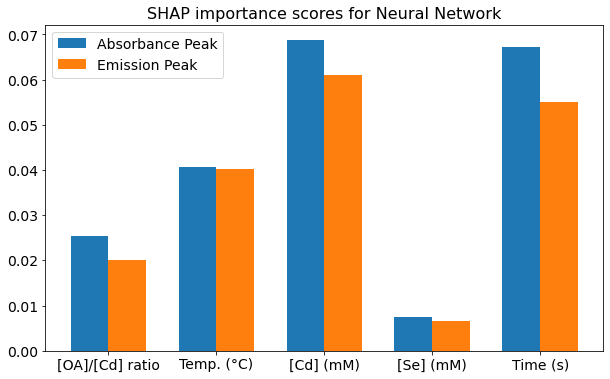

In [12]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(NN_UV_peak_shap)
emission = shaptovalues(NN_PL_peak_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance Peak')
ax.bar([i + width for i in x], emission, width, label='Emission Peak')

# Add a title to the chart
ax.set_title("SHAP importance scores for Neural Network", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_peak_NN.svg')

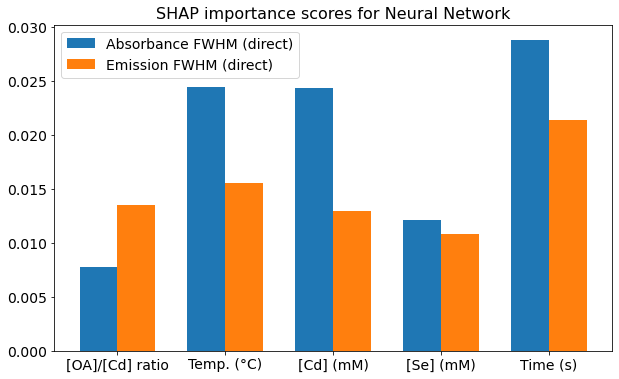

In [13]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)']
absorbance = shaptovalues(NN_UV_fwhm_shap)
emission = shaptovalues(NN_PL_fwhm_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (direct)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (direct)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Neural Network", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_fwhm_NN.svg')

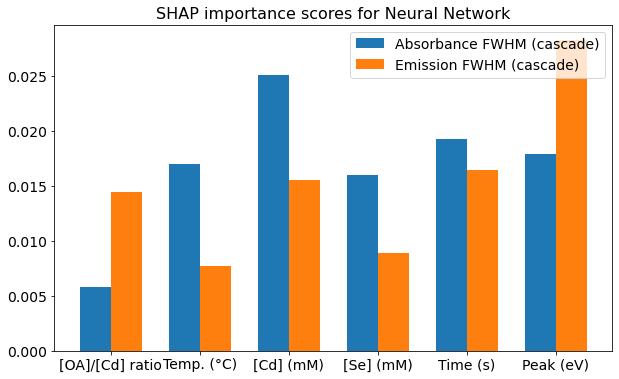

In [14]:
import matplotlib.pyplot as plt

# Define the data for the two bars for each label
labels = ['[OA]/[Cd] ratio', 'Temp. (°C)', '[Cd] (mM)', '[Se] (mM)', 'Time (s)', 'Peak (eV)']
absorbance = shaptovalues(NN_UV_cascade_shap)
emission = shaptovalues(NN_PL_cascade_shap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Use the bar() method to plot the bars for each label
width = 0.35
x = range(len(labels))
ax.bar(x, absorbance, width, label='Absorbance FWHM (cascade)')
ax.bar([i + width for i in x], emission, width, label='Emission FWHM (cascade)')

# Add a title to the chart
ax.set_title("SHAP importance scores for Neural Network", fontsize=16)

ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticks([i + 0.5 * width for i in x])
ax.set_xticklabels(labels, fontsize=14)

# Add a legend to the chart
ax.legend(fontsize=14)

# Show the chart
plt.show()

#Save figure
fig.savefig('SHAP_Importance_cascade_NN.svg')

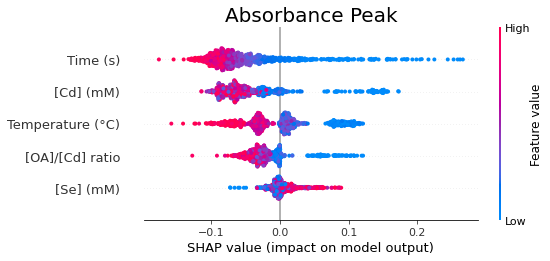

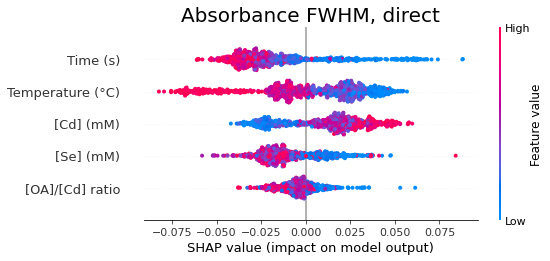

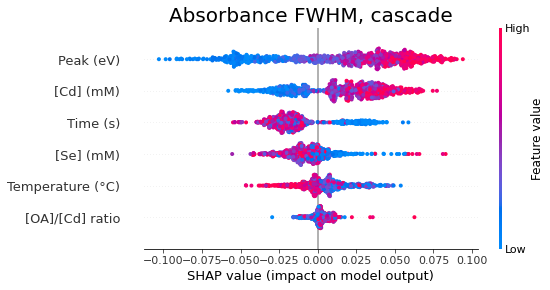

In [15]:
shap.summary_plot(Tree_UV_peak_shap, test1, show = False)
plt.title("Absorbance Peak", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_Abs_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(Tree_UV_fwhm_shap, test1, show = False)
plt.title("Absorbance FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_Abs_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(Tree_UV_cascade_shap, test2, show = False)
plt.title("Absorbance FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_Abs_cascade.svg', bbox_inches = "tight")
plt.show()

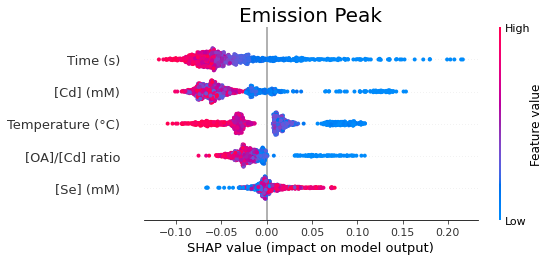

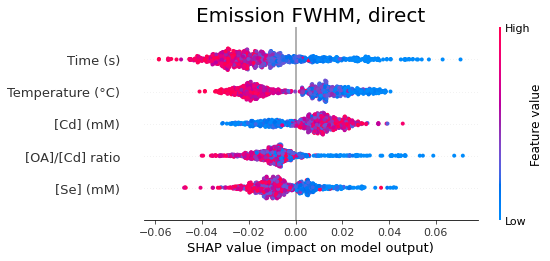

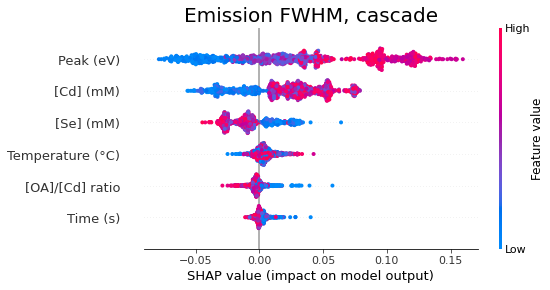

In [16]:
shap.summary_plot(Tree_PL_peak_shap, test1, show = False)
plt.title("Emission Peak", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_PL_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(Tree_PL_fwhm_shap, test1, show = False)
plt.title("Emission FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_PL_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(Tree_PL_cascade_shap, test2, show = False)
plt.title("Emission FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_Tree_PL_cascade.svg', bbox_inches = "tight")
plt.show()

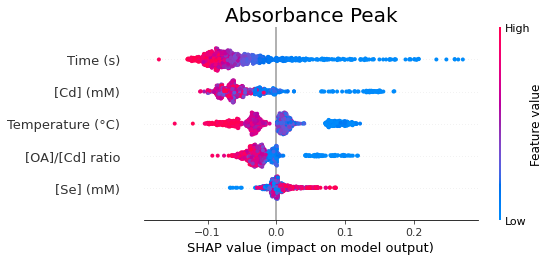

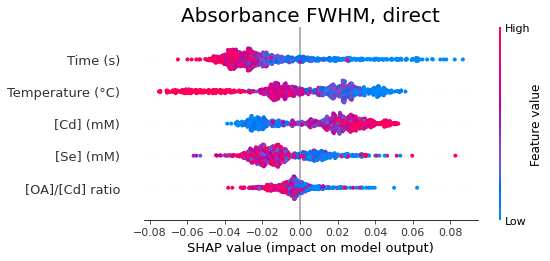

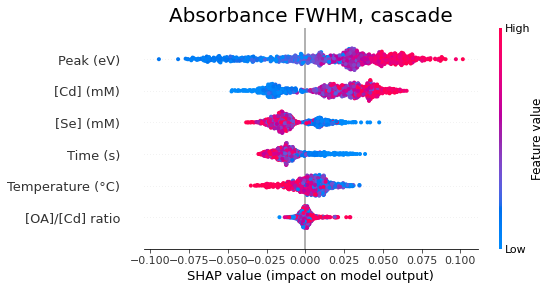

In [17]:
shap.summary_plot(RF_UV_peak_shap, test1, show = False)
plt.title("Absorbance Peak", fontsize = 20)
plt.savefig('SHAP_Summary_RF_Abs_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(RF_UV_fwhm_shap, test1, show = False)
plt.title("Absorbance FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_RF_Abs_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(RF_UV_cascade_shap, test2, show = False)
plt.title("Absorbance FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_RF_Abs_cascade.svg', bbox_inches = "tight")
plt.show()

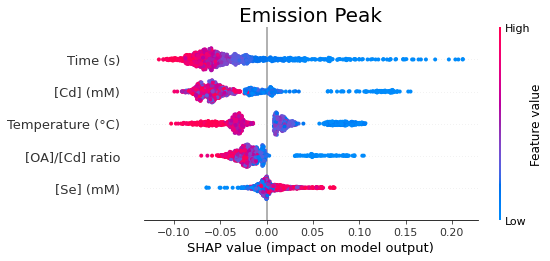

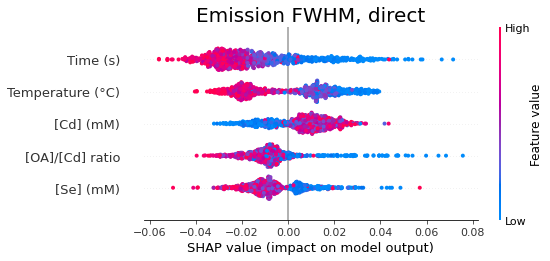

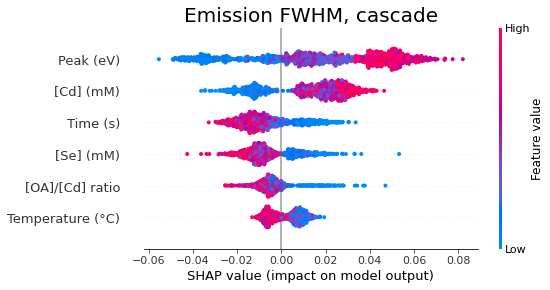

In [18]:
shap.summary_plot(RF_PL_peak_shap, test1, show = False)
plt.title("Emission Peak", fontsize = 20)
plt.savefig('SHAP_Summary_RF_PL_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(RF_PL_fwhm_shap, test1, show = False)
plt.title("Emission FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_RF_PL_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(RF_PL_cascade_shap, test2, show = False)
plt.title("Emission FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_RF_PL_cascade.svg', bbox_inches = "tight")
plt.show()

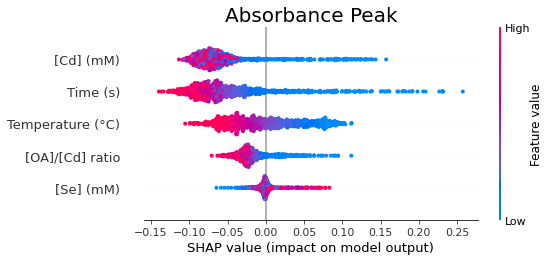

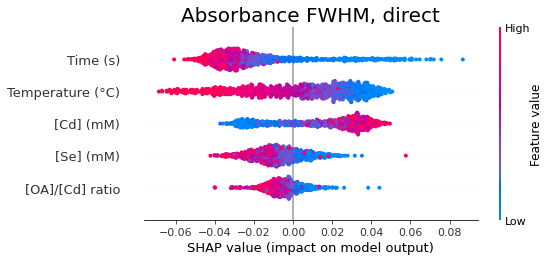

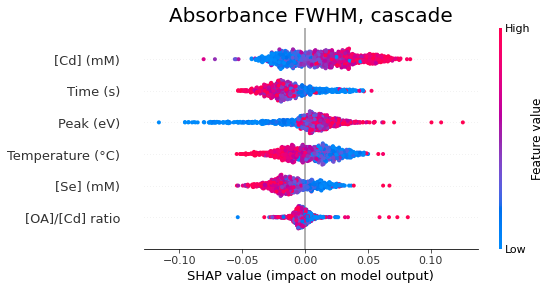

In [19]:
shap.summary_plot(NN_UV_peak_shap, test1, show = False)
plt.title("Absorbance Peak", fontsize = 20)
plt.savefig('SHAP_Summary_NN_Abs_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(NN_UV_fwhm_shap, test1, show = False)
plt.title("Absorbance FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_NN_Abs_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(NN_UV_cascade_shap, test2, show = False)
plt.title("Absorbance FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_NN_Abs_cascade.svg', bbox_inches = "tight")
plt.show()

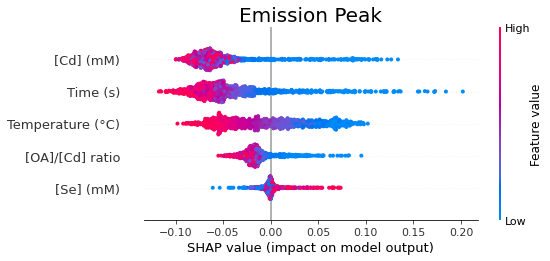

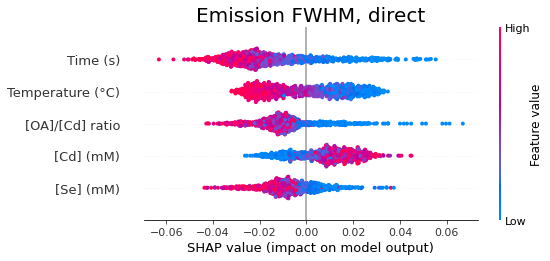

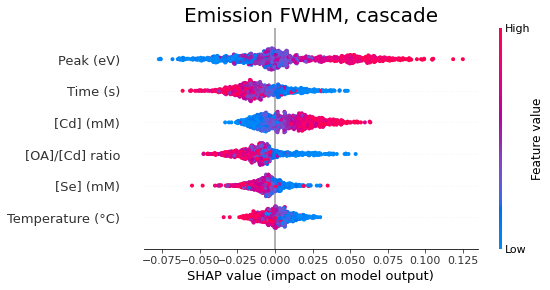

In [20]:
shap.summary_plot(NN_PL_peak_shap, test1, show = False)
plt.title("Emission Peak", fontsize = 20)
plt.savefig('SHAP_Summary_NN_PL_peak.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(NN_PL_fwhm_shap, test1, show = False)
plt.title("Emission FWHM, direct", fontsize = 20)
plt.savefig('SHAP_Summary_NN_PL_FWHM.svg', bbox_inches = "tight")
plt.show()
shap.summary_plot(NN_PL_cascade_shap, test2, show = False)
plt.title("Emission FWHM, cascade", fontsize = 20)
plt.savefig('SHAP_Summary_NN_PL_cascade.svg', bbox_inches = "tight")
plt.show()